In [1]:
require(kohonen)
set.seed(1)
col.pal <- rep(c("#771155", "#AA4488", "#CC99BB", "#114477", "#4477AA", "#77AADD", "#117777", "#44AAAA", "#77CCCC", "#117744", "#44AA77", "#88CCAA", "#777711", "#AAAA44", "#DDDD77", "#774411", "#AA7744", "#DDAA77", "#771122", "#AA4455", "#DD7788"),2)

Loading required package: kohonen


In [2]:
d.all.clean <- read.csv(file.path("..","data", "final", "clean.csv"))
d.all.noisy <- read.csv(file.path("..","data", "final", "noisy.csv"))
head(d.all.clean)

ID,magnitude,Cadence,duration,latitude,longitude,Teff,Teff_error,logg,logg_error,Type,var_lc,num_peaks,median_peaks,mad_peaks
1,16.8,1800,27.38,9.84,108.10,4354,300,-999.00,-999.00,Trans/Eclipse,2.572494e+00,2,29.86858,41.75269
2,6.0,1800,82.17,65.38,108.08,8000,200,-999.00,-999.00,Trans/Eclipse,9.459850e+05,19,57.12909,55.69576
3,15.5,1800,27.37,49.41,246.24,2754,250,-999.00,-999.00,LPV;MIRA,2.589982e+02,2,31.12475,11.37836
4,13.8,120,27.40,42.44,226.11,16160,130,3.91,0.16,SPB,4.066555e+01,9,127.49338,68.59015
5,14.6,20,27.40,52.68,180.44,8000,200,-999.00,-999.00,Trans/Eclipse,1.204713e-01,611,4899.64632,4507.44102
6,10.3,1800,54.79,40.29,283.81,2780,250,-999.00,-999.00,LPV;MIRA,6.048815e+06,2,28.92632,14.50562


In [3]:
d.all.clean <- d.all.clean[!is.na(d.all.clean$var_lc),]
d.all.noisy <- d.all.noisy[!is.na(d.all.noisy$var_lc),]

## Clean data set

In [4]:
d.train <- d.all.clean[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.train <- scale(d.train)
d.som <- som(as.matrix(d.train), grid = somgrid(20,20,"rectangular"))

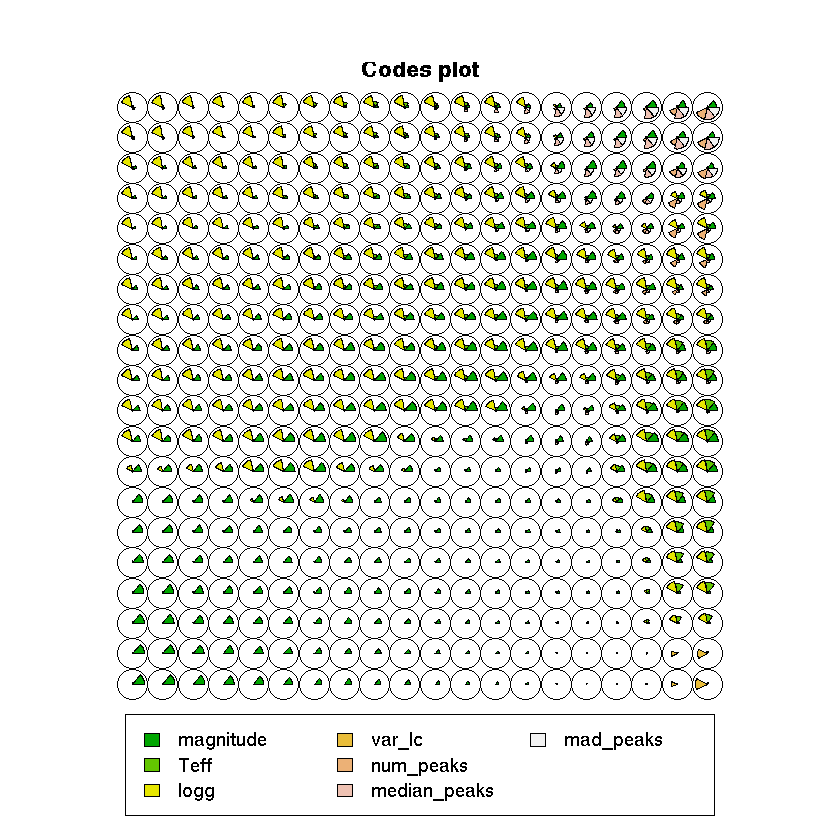

In [5]:
plot(d.som)

In [6]:
d.map <- map(x = d.som, newdata = as.matrix(d.train))

[1]   1 400

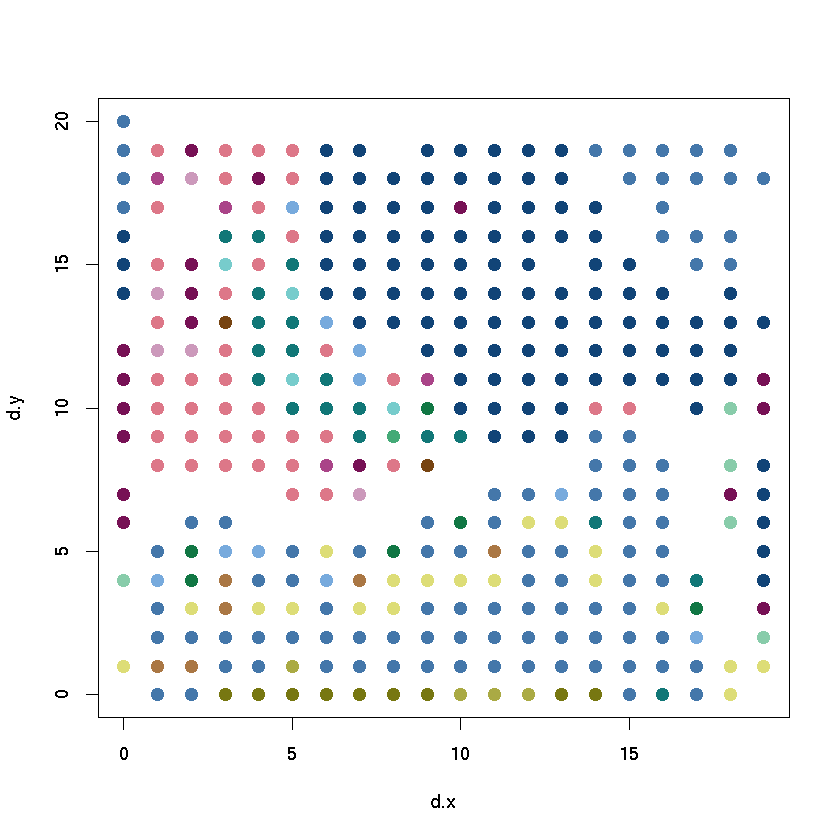

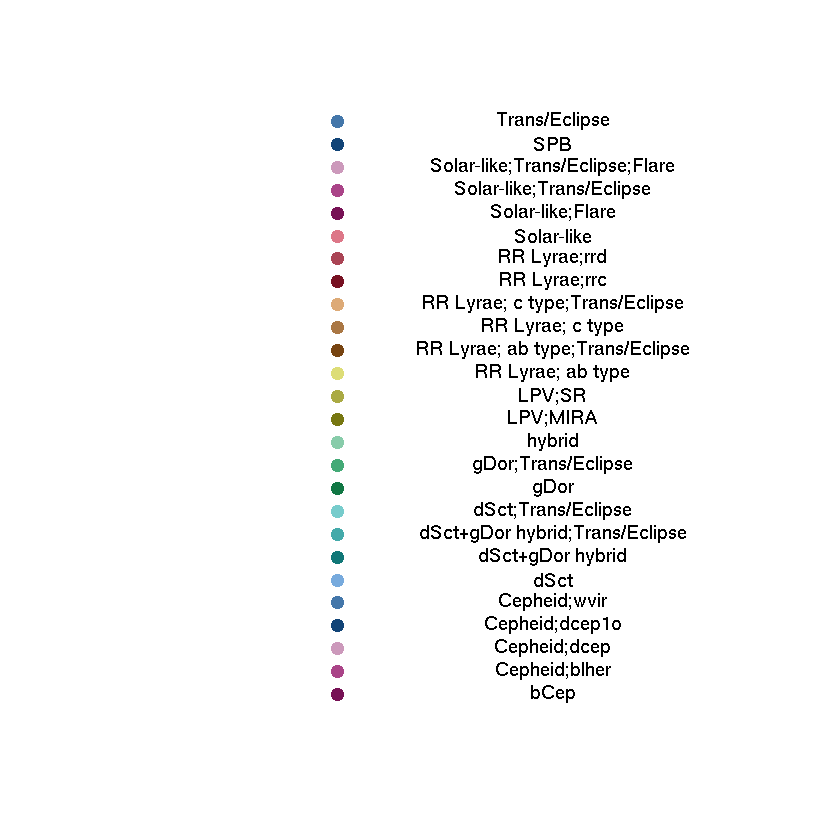

In [7]:
range(d.som$unit.classif)
d.x <- d.map$unit.classif %% 20
d.y <- (d.map$unit.classif %/% 20)

plot(d.x, d.y, col = col.pal[d.all.clean$Type], pch = 20, cex = 2)
plot(rep(1, times = 26), 1:26, pch = 20, xlim = c(0,3), cex = 2,
     col = col.pal[1:26], axes = FALSE, xlab = "", ylab ="")
text(rep(2, times = 26), 1:26, levels(d.all.clean$Type))

In [8]:
d.som2 <- expandMap(expandMap(d.som))

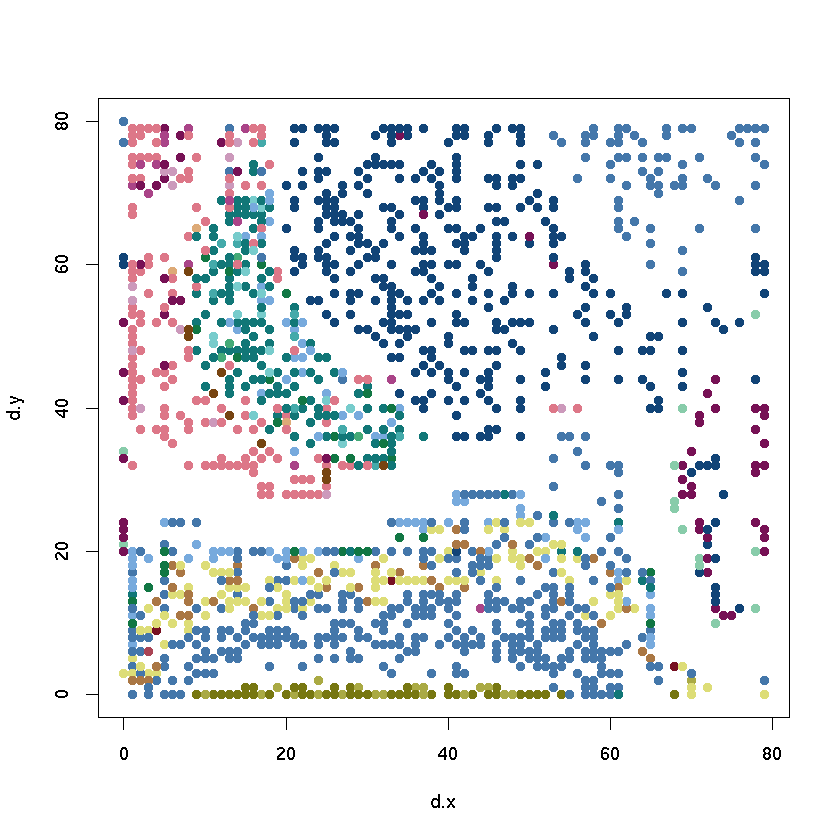

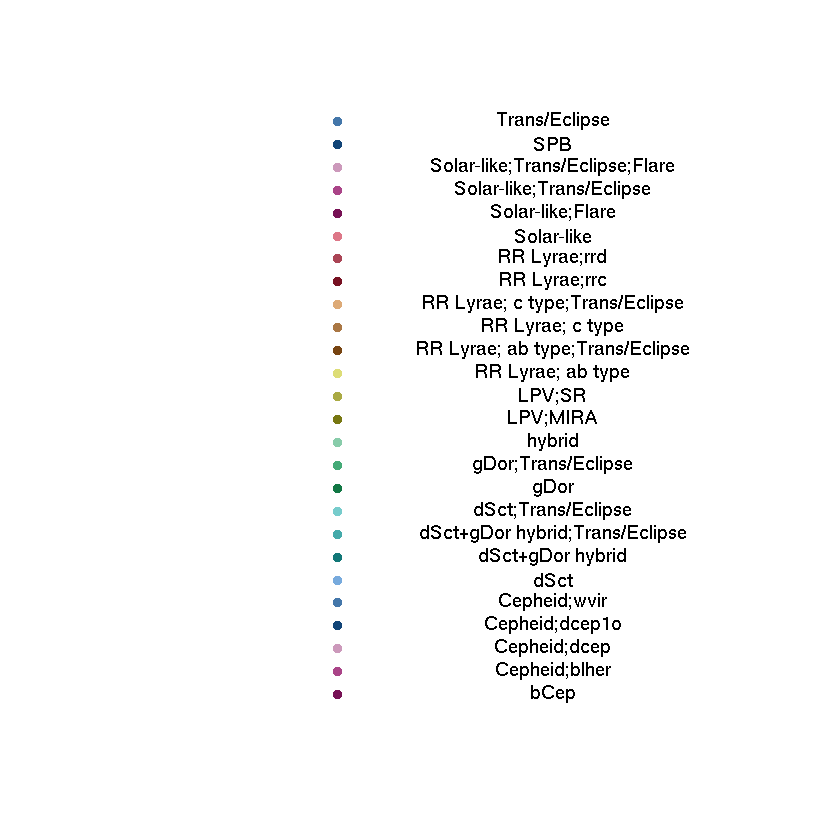

In [9]:
d.map2 <- map(x = d.som2, newdata = as.matrix(d.train))
d.x <- d.map2$unit.classif %% 80
d.y <- (d.map2$unit.classif %/% 80)

plot(d.x, d.y, col = col.pal[d.all.clean$Type], pch = 20, cex = 1.5)
plot(rep(1, times = 26), 1:26, pch = 20, xlim = c(0,3), cex = 1.5,
     col = col.pal[1:26], axes = FALSE, xlab = "", ylab ="")
text(rep(2, times = 26), 1:26, levels(d.all.clean$Type))

## Noisy data set

In [10]:
d.train <- d.all.noisy[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.train <- scale(d.train)
d.som <- som(as.matrix(d.train), grid = somgrid(20,20,"rectangular"))

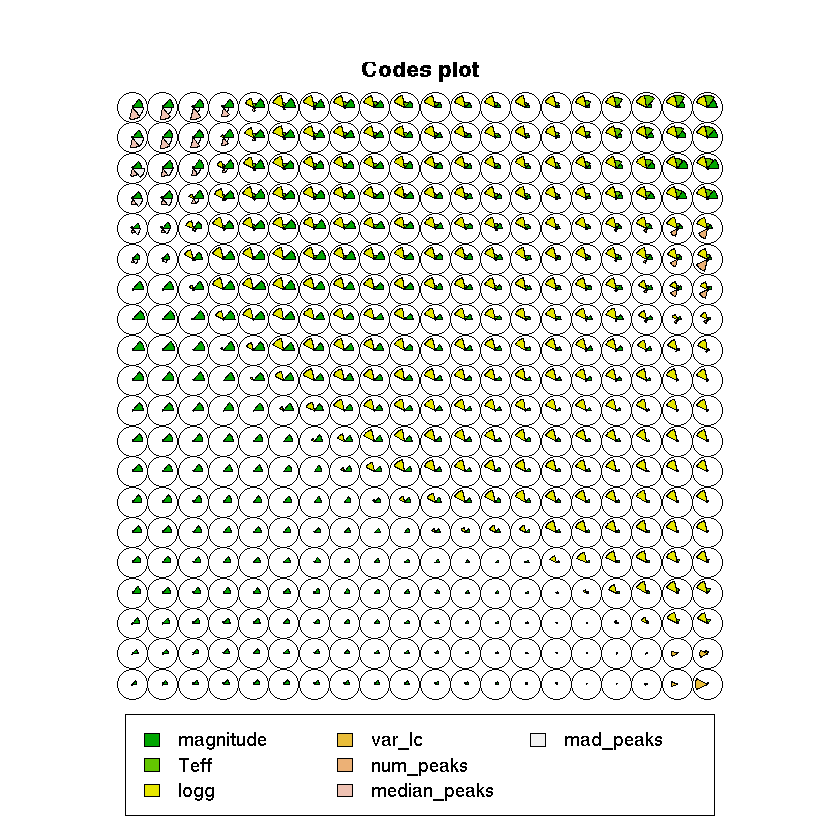

In [11]:
plot(d.som)

In [12]:
d.map <- map(x = d.som, newdata = as.matrix(d.train))

[1]   1 400

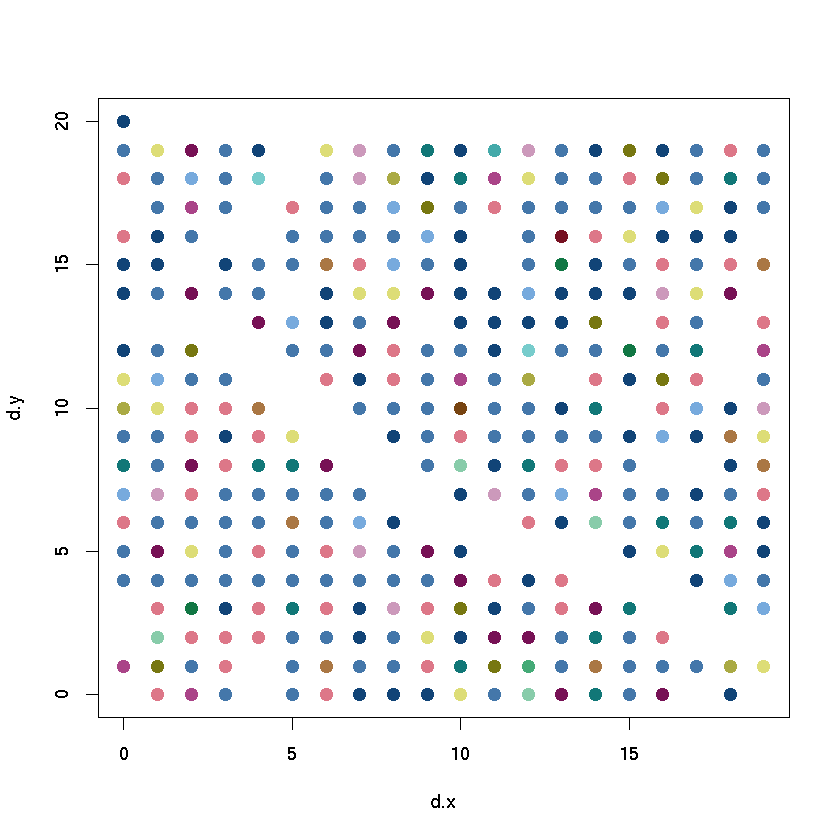

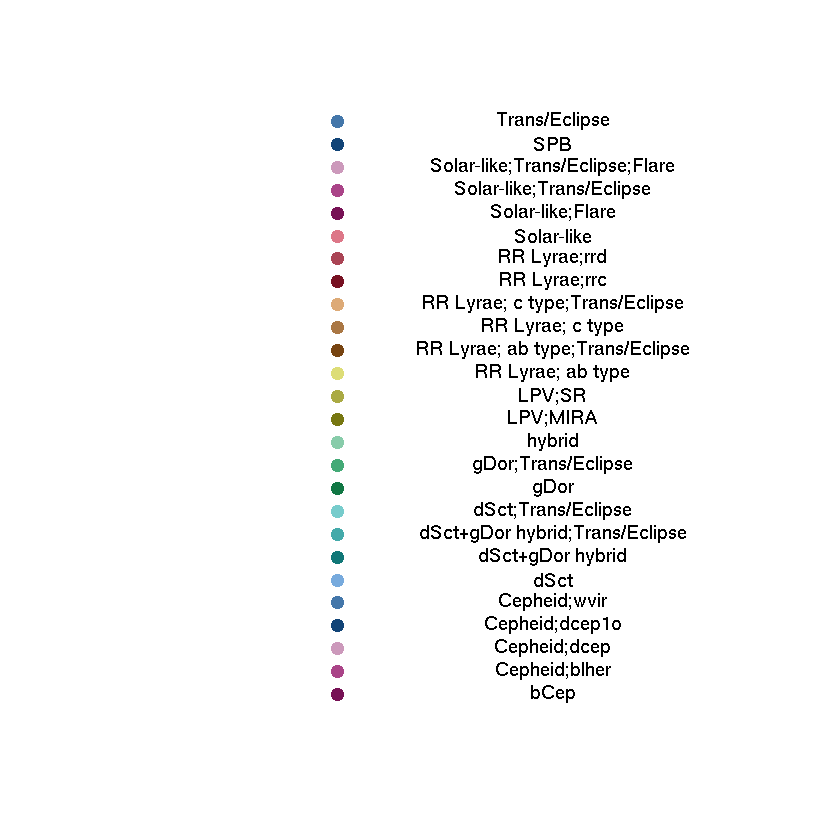

In [13]:
range(d.som$unit.classif)
d.x <- d.map$unit.classif %% 20
d.y <- (d.map$unit.classif %/% 20)

plot(d.x, d.y, col = col.pal[d.all.clean$Type], pch = 20, cex = 2)
plot(rep(1, times = 26), 1:26, pch = 20, xlim = c(0,3), col = col.pal[1:26], cex = 2,
     axes = FALSE, xlab = "", ylab ="")
text(rep(2, times = 26), 1:26, levels(d.all.clean$Type))

In [14]:
d.som2 <- expandMap(expandMap(d.som))

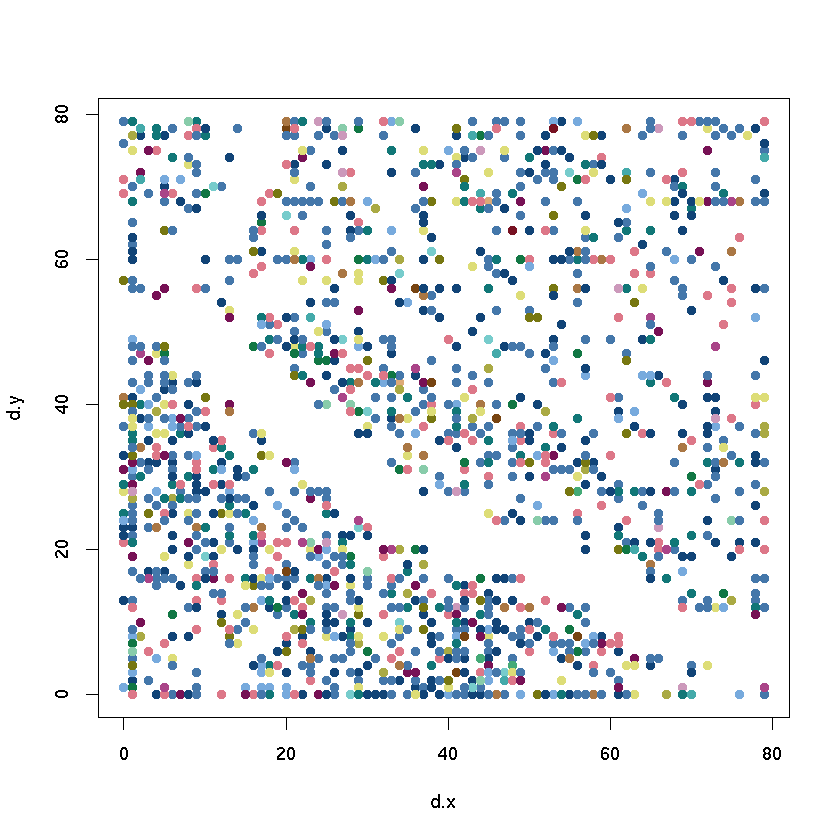

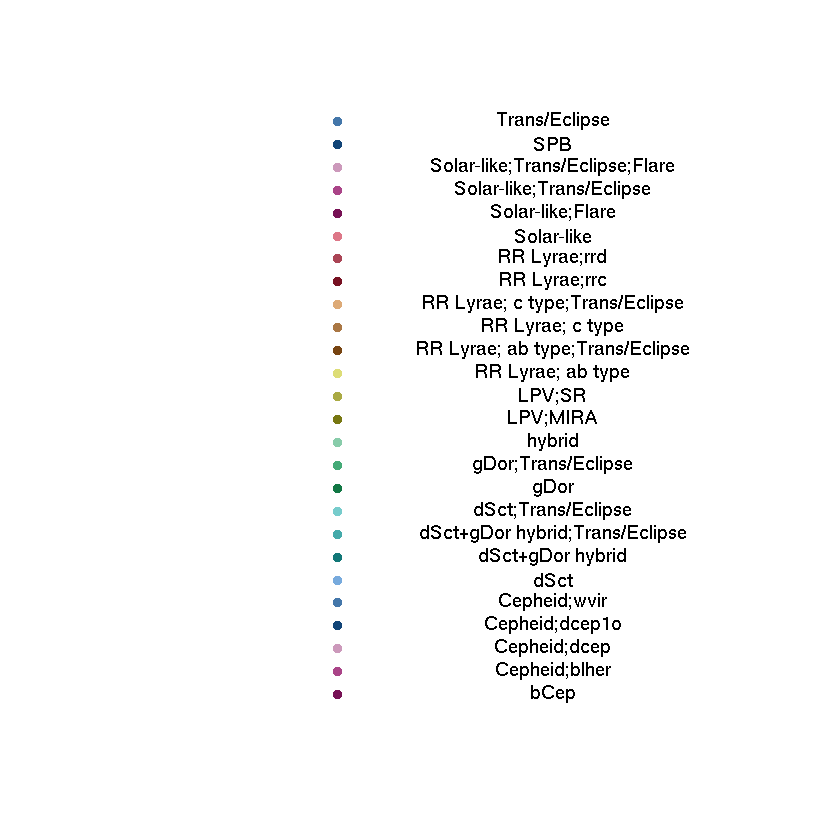

In [15]:
d.map2 <- map(x = d.som2, newdata = as.matrix(d.train))
d.x <- d.map2$unit.classif %% 80
d.y <- (d.map2$unit.classif %/% 80)

plot(d.x, d.y, col = col.pal[d.all.clean$Type], pch = 20, cex = 1.5)
plot(rep(1, times = 26), 1:26, pch = 20, xlim = c(0,3), cex = 1.5,
     col = col.pal[1:26], axes = FALSE, xlab = "", ylab ="")
text(rep(2, times = 26), 1:26, levels(d.all.clean$Type))

In [16]:
table(d.all.clean$Type)


                            bCep                    Cepheid;blher 
                              58                                3 
                    Cepheid;dcep                   Cepheid;dcep1o 
                               2                                1 
                    Cepheid;wvir                             dSct 
                               1                              152 
                dSct+gDor hybrid   dSct+gDor hybrid;Trans/Eclipse 
                             204                               17 
              dSct;Trans/Eclipse                             gDor 
                              23                               49 
              gDor;Trans/Eclipse                           hybrid 
                               5                               17 
                        LPV;MIRA                           LPV;SR 
                              67                               40 
               RR Lyrae; ab type  RR Lyrae; ab type;Trans/Ecl